In [1]:
import numpy as np 
import pandas as pd 
import yellowbrick
from yellowbrick.text import FreqDistVisualizer
import seaborn as sn


# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA


# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

###
import logging

from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


%matplotlib inline

# UPLAOD DATASET

In [2]:
data_contaminantes = pd.read_csv('/Users/Alexandra/Documents/02_Curso_Data_Science/Proyecto_5_Final_Project/Datos_contaminantes_2000/Contaminantes_1991_2020_defnitivo_02.csv')
data_meteo = pd.read_csv('/Users/Alexandra/Documents/02_Curso_Data_Science/Proyecto_5_Final_Project/Medidas de las Estaciones Meteorológicas de la Ciudad De Barcelona/2019/Meteorologia_1996-2020.csv')



In [3]:
data_contaminantes.head()

,Data,CO,H2S,HCNM,HCT,NO,NO2,NOX,O3,PM10,PM2.5,PS,SO2
0,1991-01-01,1.978261,NaN,NaN,NaN,92.826087,24.523810,NaN,27.956522,NaN,NaN,NaN,20.000000
1,1991-01-02,2.308696,NaN,NaN,NaN,120.500000,45.590909,NaN,18.362319,NaN,NaN,137.666667,33.761905
2,1991-01-03,5.669643,NaN,NaN,NaN,210.375000,78.125000,NaN,12.744048,NaN,NaN,181.000000,55.958333
3,1991-01-04,2.563913,NaN,NaN,NaN,114.958333,50.000000,NaN,16.112500,NaN,NaN,109.000000,25.291667
4,1991-01-05,1.289583,NaN,NaN,NaN,27.166667,31.875000,NaN,19.541667,NaN,NaN,90.291667,NaN


In [4]:
print('Contamianantes, formato: \n',data_contaminantes.dtypes)
print('Meteorologia, formato: \n',data_meteo.dtypes)

Contamianantes, formato: 
 Data      object
CO       float64
H2S      float64
HCNM     float64
HCT      float64
NO       float64
NO2      float64
NOX      float64
O3       float64
PM10     float64
PM2.5    float64
PS       float64
SO2      float64
dtype: object
Meteorologia, formato: 
 DATA_LECTURA     object
TM              float64
TX              float64
TN              float64
HRM             float64
PPT24H          float64
HPA             float64
RS24H           float64
VVM10           float64
DVM10           float64
VVX10           float64
DVX10           float64
dtype: object


In [5]:
data_meteo['Data']=data_meteo['DATA_LECTURA']

In [6]:
data_meteo=data_meteo.drop(['DATA_LECTURA'], axis=1)

In [7]:
data_meteo.head(20)

,TM,TX,TN,HRM,PPT24H,HPA,RS24H,VVM10,DVM10,VVX10,DVX10,Data
0,13.2,17.7,10.0,NaN,0.0,955.9,NaN,6.0,NaN,12.5,268.0,1996-01-01
1,11.3,15.4,9.2,NaN,0.0,965.6,NaN,7.3,NaN,16.6,310.0,1996-02-01
2,9.9,14.7,6.6,63.0,0.0,969.9,NaN,6.7,NaN,NaN,NaN,1996-03-01
3,10.3,12.5,NaN,63.0,0.0,967.0,NaN,4.1,NaN,10.1,268.0,1996-04-01
4,9.8,13.3,6.6,87.0,1.2,956.0,NaN,4.6,NaN,11.8,314.0,1996-05-01
5,9.7,16.1,5.2,79.0,2.8,954.4,NaN,6.0,NaN,14.5,333.0,1996-06-01
6,11.0,16.1,8.5,76.0,0.0,958.2,NaN,5.2,NaN,11.4,327.0,1996-07-01
7,10.7,17.7,7.2,73.0,0.0,966.1,NaN,7.2,NaN,12.9,309.0,1996-08-01
8,11.5,14.7,NaN,98.0,9.0,959.0,NaN,6.3,NaN,14.3,67.0,1996-09-01
9,8.8,12.1,7.5,99.0,12.0,957.6,NaN,5.5,NaN,NaN,NaN,1996-10-01


## Join both dataset

In [8]:
df_result = pd.merge(data_meteo, data_contaminantes, on=['Data'])

In [9]:
df_result.head()

,TM,TX,TN,HRM,PPT24H,HPA,RS24H,VVM10,DVM10,VVX10,...,HCNM,HCT,NO,NO2,NOX,O3,PM10,PM2.5,PS,SO2
0,13.2,17.7,10.0,NaN,0.0,955.9,NaN,6.0,NaN,12.5,...,NaN,NaN,44.742424,42.291667,NaN,23.583333,NaN,NaN,27.416667,12.125000
1,11.3,15.4,9.2,NaN,0.0,965.6,NaN,7.3,NaN,16.6,...,NaN,NaN,42.368395,44.800892,NaN,22.376812,NaN,NaN,41.520833,12.229167
2,9.9,14.7,6.6,63.0,0.0,969.9,NaN,6.7,NaN,NaN,...,NaN,NaN,93.583333,64.430556,NaN,9.680556,NaN,NaN,70.062500,12.083333
3,10.3,12.5,NaN,63.0,0.0,967.0,NaN,4.1,NaN,10.1,...,NaN,NaN,78.516667,61.208333,NaN,10.305556,NaN,NaN,54.062500,13.145833
4,9.8,13.3,6.6,87.0,1.2,956.0,NaN,4.6,NaN,11.8,...,NaN,NaN,13.333333,37.833333,NaN,38.041667,NaN,NaN,40.333333,15.083333


## Missing values

In [10]:
values_missing = df_result.isna().sum()

In [11]:
values_missing / len(df_result)*100

TM          7.511951
TX          7.557478
TN          7.694059
HRM         7.363988
PPT24H      0.000000
HPA         6.180287
RS24H       9.389939
VVM10      30.252675
DVM10      33.485090
VVX10       8.229001
DVX10       8.229001
Data        0.000000
CO          0.147963
H2S        80.821762
HCNM      100.000000
HCT       100.000000
NO          0.000000
NO2         0.079672
NOX        48.702481
O3          0.091054
PM10       28.442977
PM2.5      97.063510
PS         88.424767
SO2        16.970180
dtype: float64

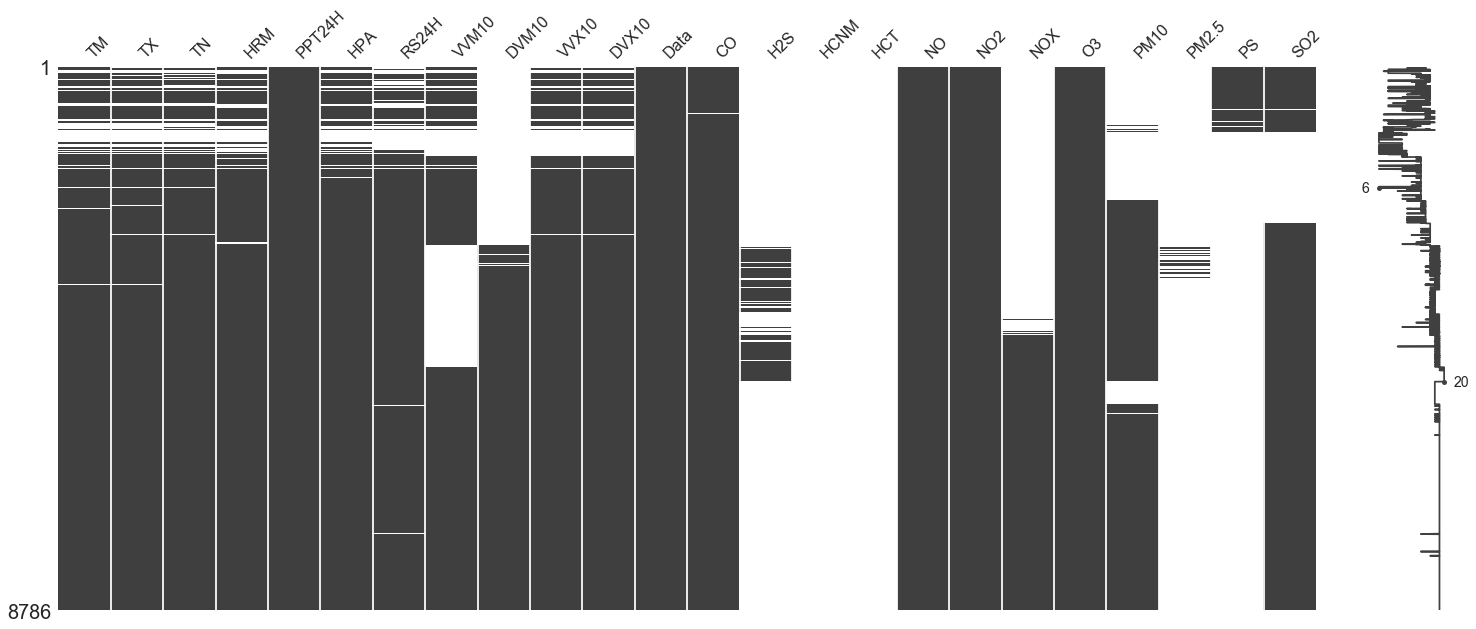

In [12]:
import missingno as msno
msno.matrix(df_result)

In [13]:
df_result.Data.head()

0    1996-01-01
1    1996-02-01
2    1996-03-01
3    1996-04-01
4    1996-05-01
Name: Data, dtype: object

#### Separe date in month, day, year

In [14]:
df_result['month'] = pd.DatetimeIndex(df_result['Data']).month
df_result['day'] = pd.DatetimeIndex(df_result['Data']).day
df_result['year'] = pd.DatetimeIndex(df_result['Data']).year

In [15]:
df_result.head(100)

,TM,TX,TN,HRM,PPT24H,HPA,RS24H,VVM10,DVM10,VVX10,...,NO2,NOX,O3,PM10,PM2.5,PS,SO2,month,day,year
0,13.2,17.7,10.0,NaN,0.0,955.9,NaN,6.0,NaN,12.5,...,42.291667,NaN,23.583333,NaN,NaN,27.416667,12.125000,1,1,1996
1,11.3,15.4,9.2,NaN,0.0,965.6,NaN,7.3,NaN,16.6,...,44.800892,NaN,22.376812,NaN,NaN,41.520833,12.229167,2,1,1996
2,9.9,14.7,6.6,63.0,0.0,969.9,NaN,6.7,NaN,NaN,...,64.430556,NaN,9.680556,NaN,NaN,70.062500,12.083333,3,1,1996
3,10.3,12.5,NaN,63.0,0.0,967.0,NaN,4.1,NaN,10.1,...,61.208333,NaN,10.305556,NaN,NaN,54.062500,13.145833,4,1,1996
4,9.8,13.3,6.6,87.0,1.2,956.0,NaN,4.6,NaN,11.8,...,37.833333,NaN,38.041667,NaN,NaN,40.333333,15.083333,5,1,1996
5,9.7,16.1,5.2,79.0,2.8,954.4,NaN,6.0,NaN,14.5,...,39.012121,NaN,33.987689,NaN,NaN,33.520833,11.000000,6,1,1996
6,11.0,16.1,8.5,76.0,0.0,958.2,NaN,5.2,NaN,11.4,...,55.671943,NaN,35.497241,NaN,NaN,45.791667,11.125000,7,1,1996
7,10.7,17.7,7.2,73.0,0.0,966.1,NaN,7.2,NaN,12.9,...,53.081324,NaN,25.033333,NaN,NaN,51.020833,11.083333,8,1,1996
8,11.5,14.7,NaN,98.0,9.0,959.0,NaN,6.3,NaN,14.3,...,43.367424,NaN,49.463068,NaN,NaN,27.354167,11.000000,9,1,1996
9,8.8,12.1,7.5,99.0,12.0,957.6,NaN,5.5,NaN,NaN,...,37.218478,NaN,36.294686,NaN,NaN,39.437500,11.000000,10,1,1996


In [16]:
# delete data 2020
df_result = df_result[df_result.year != 2020]

In [17]:
df_result.head()

,TM,TX,TN,HRM,PPT24H,HPA,RS24H,VVM10,DVM10,VVX10,...,NO2,NOX,O3,PM10,PM2.5,PS,SO2,month,day,year
0,13.2,17.7,10.0,NaN,0.0,955.9,NaN,6.0,NaN,12.5,...,42.291667,NaN,23.583333,NaN,NaN,27.416667,12.125000,1,1,1996
1,11.3,15.4,9.2,NaN,0.0,965.6,NaN,7.3,NaN,16.6,...,44.800892,NaN,22.376812,NaN,NaN,41.520833,12.229167,2,1,1996
2,9.9,14.7,6.6,63.0,0.0,969.9,NaN,6.7,NaN,NaN,...,64.430556,NaN,9.680556,NaN,NaN,70.062500,12.083333,3,1,1996
3,10.3,12.5,NaN,63.0,0.0,967.0,NaN,4.1,NaN,10.1,...,61.208333,NaN,10.305556,NaN,NaN,54.062500,13.145833,4,1,1996
4,9.8,13.3,6.6,87.0,1.2,956.0,NaN,4.6,NaN,11.8,...,37.833333,NaN,38.041667,NaN,NaN,40.333333,15.083333,5,1,1996


#### Rearrange columns in my dataset

In [18]:
df_result.columns

Index(['TM', 'TX', 'TN', 'HRM', 'PPT24H', 'HPA', 'RS24H', 'VVM10', 'DVM10',
       'VVX10', 'DVX10', 'Data', 'CO', 'H2S', 'HCNM', 'HCT', 'NO', 'NO2',
       'NOX', 'O3', 'PM10', 'PM2.5', 'PS', 'SO2', 'month', 'day', 'year'],
      dtype='object')

In [19]:
df_result = df_result[['Data', 'month', 'day', 'year','TM', 'TX', 'TN', 'HRM', 'PPT24H', 'HPA', 'RS24H', 'VVM10', 'DVM10','VVX10', 'DVX10', 'CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2','NOX', 'H2S','PS','PM2.5', 'HCNM', 'HCT']]
#df_result.head()

<html>
<head>
<title></title>
</head>
<body>

<h2>Correlation and Heatmap of my dataset</h2>
<p><u></u></p>

</body>
</html>

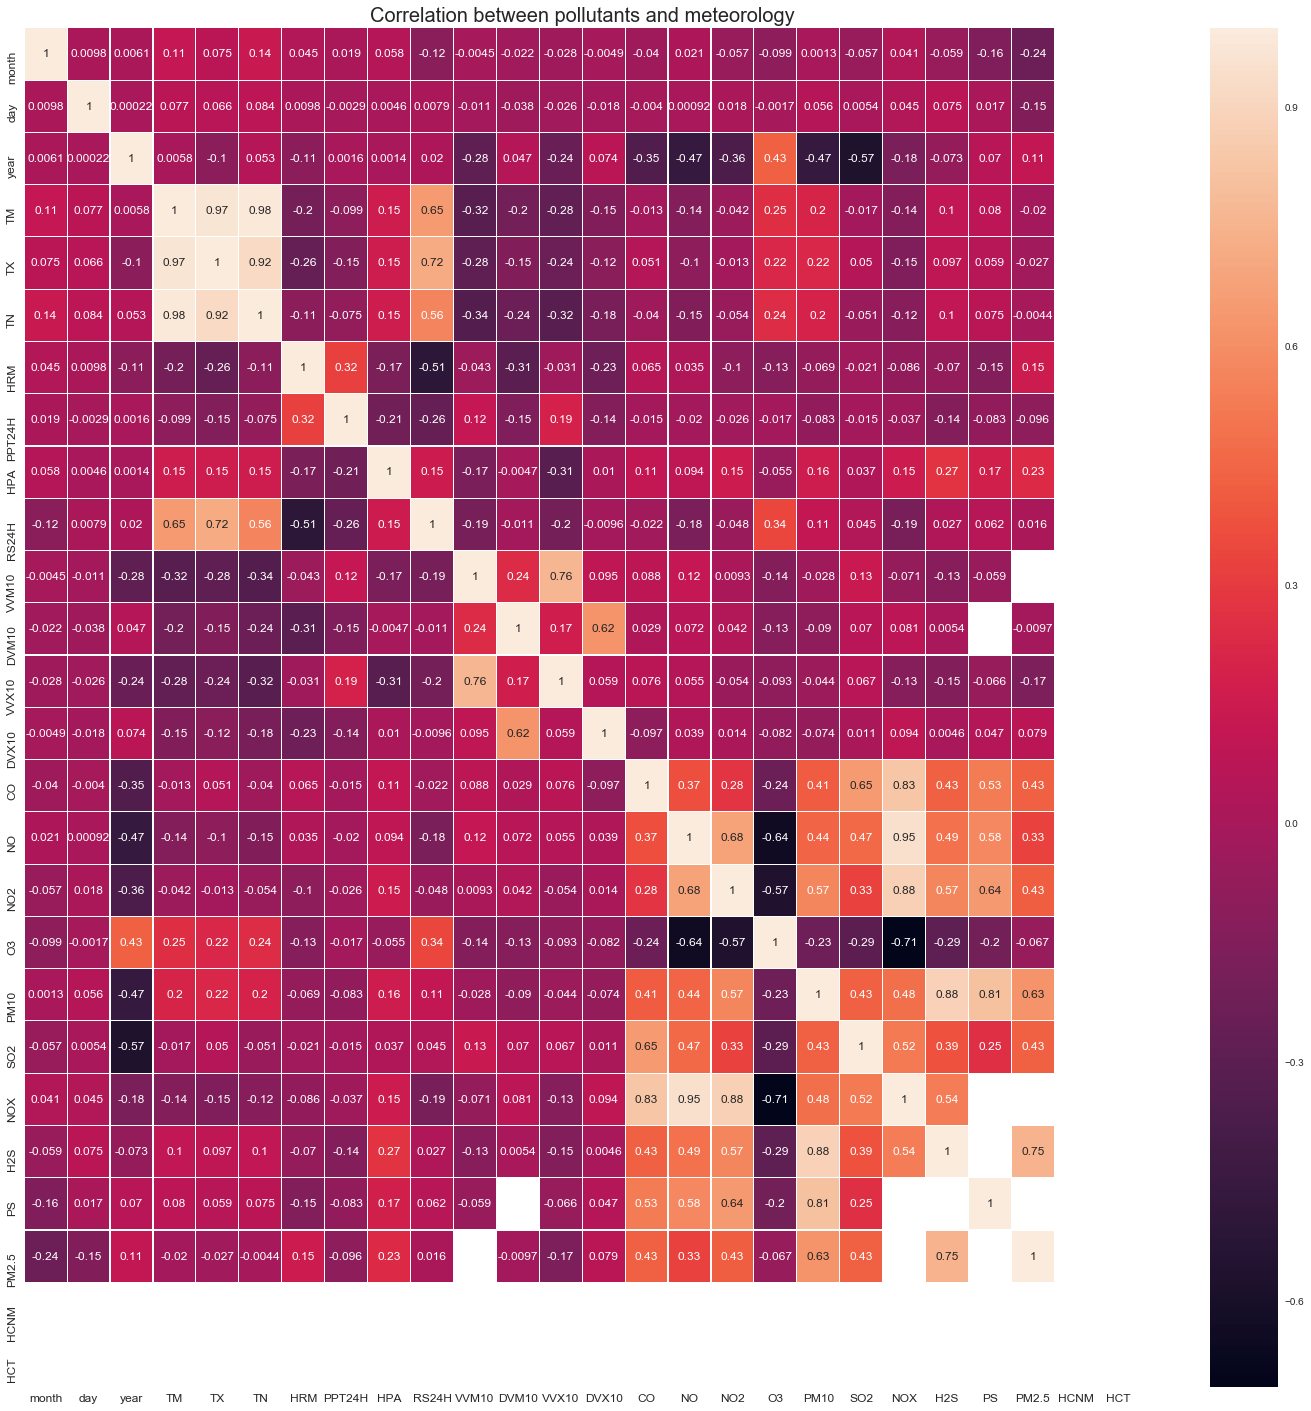

In [20]:
#everything
corrMatrix = df_result.corr()
fig, ax = plt.subplots(figsize=(25,25))     
sn.heatmap(corrMatrix, annot=True, linewidths=0.1, annot_kws={"size":12})
plt.title('Correlation between pollutants and meteorology', size=20)

plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(False)
plt.savefig('X11_Correlationb_between_pollutants_and_meteorology_presentation', dpi=210)
plt.show()

In [21]:
tm_o3=df_result.iloc[1:3, 0:3]

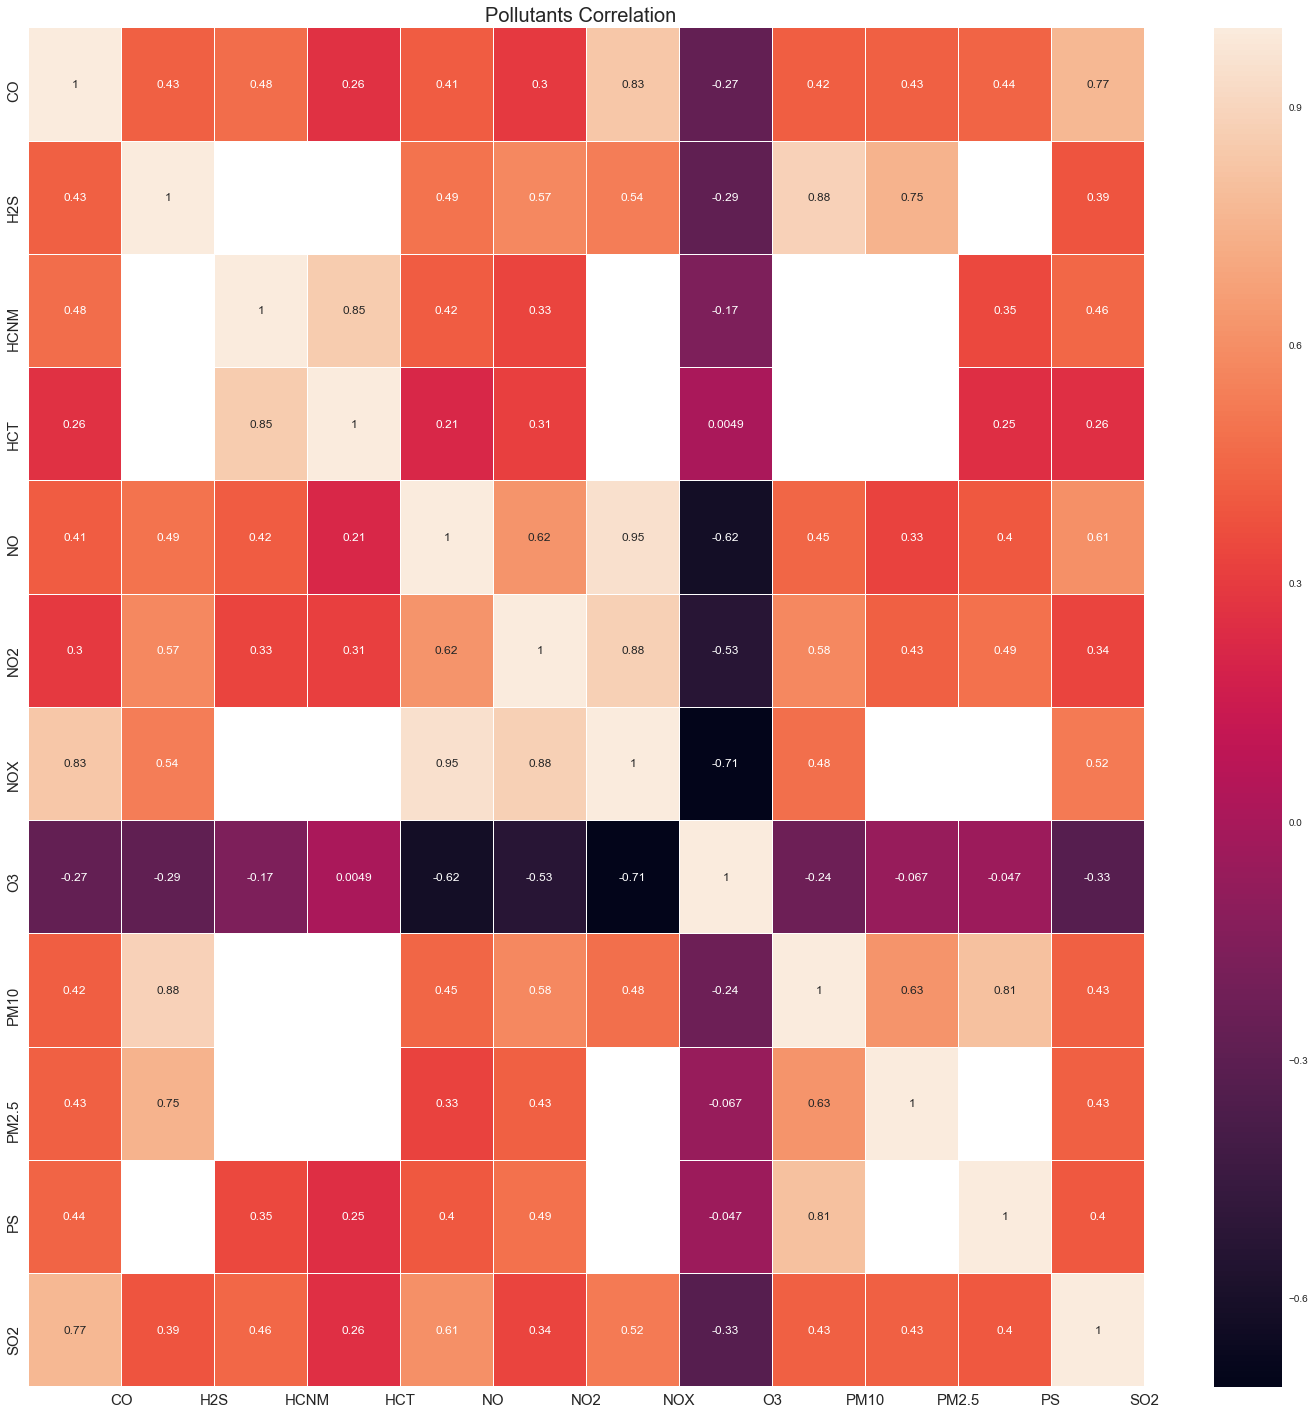

In [22]:
#Correlation only pollutants
corrMatrix_con = data_contaminantes.corr()
fig, ax = plt.subplots(figsize=(25,25))     
sn.heatmap(corrMatrix_con, annot=True, linewidths=0.1, annot_kws={"size":12})
plt.title('Pollutants Correlation  ', size=20)


plt.xticks([x for x in range(1,13)], size=15)
plt.yticks(size=15)
plt.grid(False)
plt.savefig('X12_Correlationb_between_pollutants_presentation', dpi=210)
plt.show()

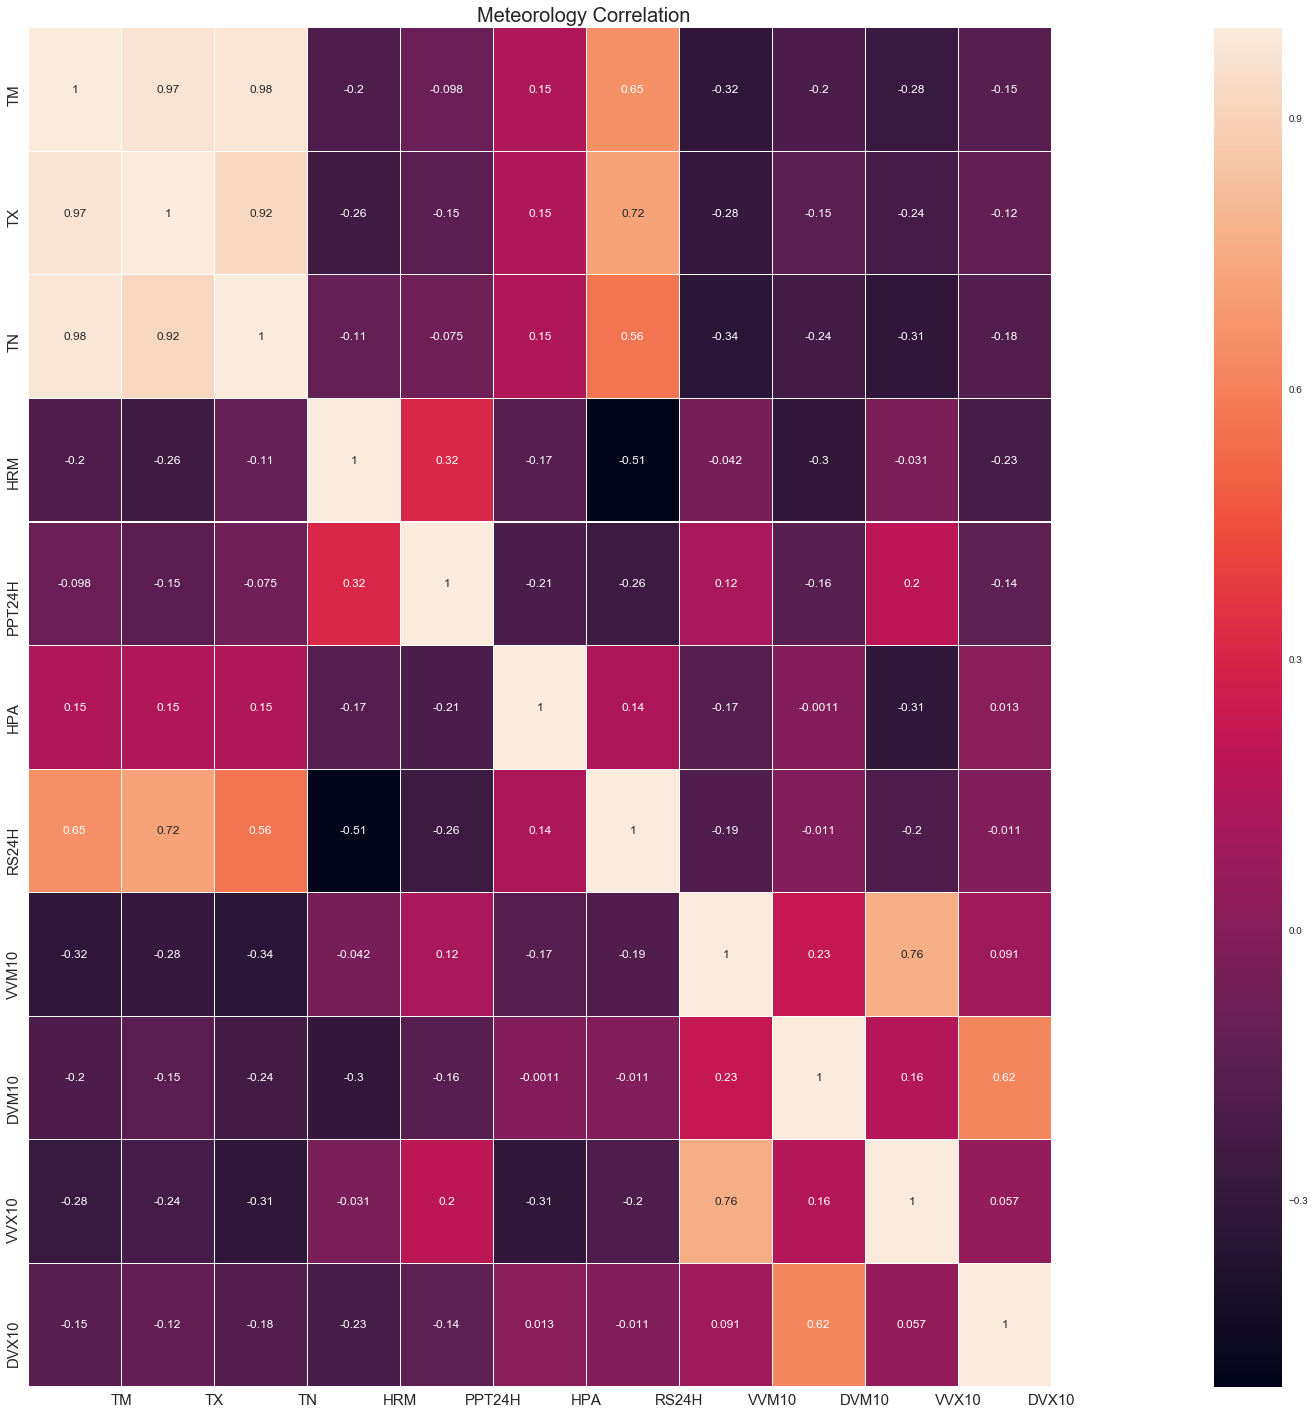

In [23]:
# correlation between metorology features
corrMatrix_meteo = data_meteo.corr()
fig, ax = plt.subplots(figsize=(25,25))     
sn.heatmap(corrMatrix_meteo, annot=True, linewidths=0.1, annot_kws={"size":12})

plt.title('Meteorology Correlation ', size=20)

plt.xticks([x for x in range(1,13)], size=15)
plt.yticks(size=15)
plt.grid(False)
plt.savefig('X13_Correlationb_meteorology_presentation', dpi=210)
plt.show()

In [79]:
data_contaminantes.columns

Index(['Data', 'CO', 'H2S', 'HCNM', 'HCT', 'NO', 'NO2', 'NOX', 'O3', 'PM10',
       'PM2.5', 'PS', 'SO2', 'month', 'year'],
      dtype='object')

In [82]:
data_con_df = data_contaminantes.drop(['Data', 'H2S', 'HCNM', 'HCT', 'PM10',
       'PM2.5', 'PS', 'SO2', 'month', 'year'], axis=1)


In [100]:
#data_con_df

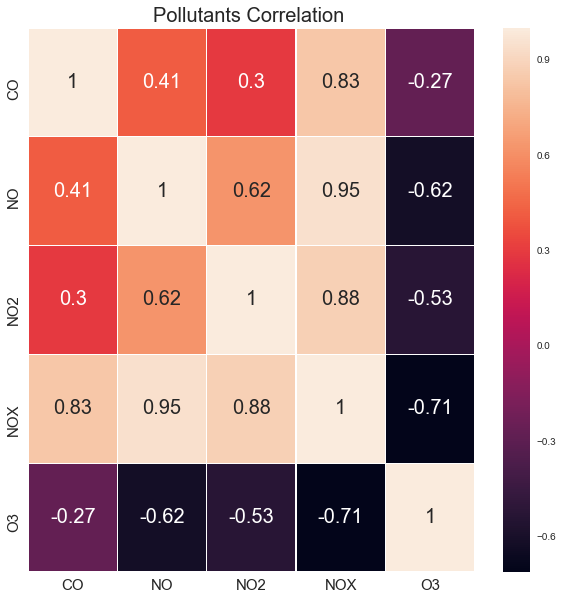

In [93]:
# correlation most important pollutants find in the stations
corrMatrix_meteo_df = data_con_df.corr()
fig, ax = plt.subplots(figsize=(10,10))     
sn.heatmap(corrMatrix_meteo_df, annot=True, linewidths=0.1, annot_kws={"size":20})

plt.title('Pollutants Correlation ', size=20)

plt.xticks(size=15)
plt.yticks(size=15)
plt.grid(False)
plt.savefig('12_pollutants_correlation_presentation', dpi=100)
plt.show()

# La usencia de O3 es la existencia de CO, NO,NO2. Esto es debido a l

In [94]:
df_result.columns

Index(['Data', 'month', 'day', 'year', 'TM', 'TX', 'TN', 'HRM', 'PPT24H',
       'HPA', 'RS24H', 'VVM10', 'DVM10', 'VVX10', 'DVX10', 'CO', 'NO', 'NO2',
       'O3', 'PM10', 'SO2', 'NOX', 'H2S', 'PS', 'PM2.5', 'HCNM', 'HCT'],
      dtype='object')

In [ ]:
df_result_df=df_result.drop(['Data', 'month', 'day', 'year', 'TM', 'TX', 'TN', 'HRM', 'PPT24H', 'HPA', 'VVM10', 'DVM10', 'VVX10', 'DVX10', 'CO', 'NO2','NOX', 'PM10', 'SO2', 'NO', 'H2S', 'PS', 'PM2.5', 'HCNM', 'HCT'], axis=1)


In [105]:
df_result_df.columns

Index(['RS24H', 'O3'], dtype='object')

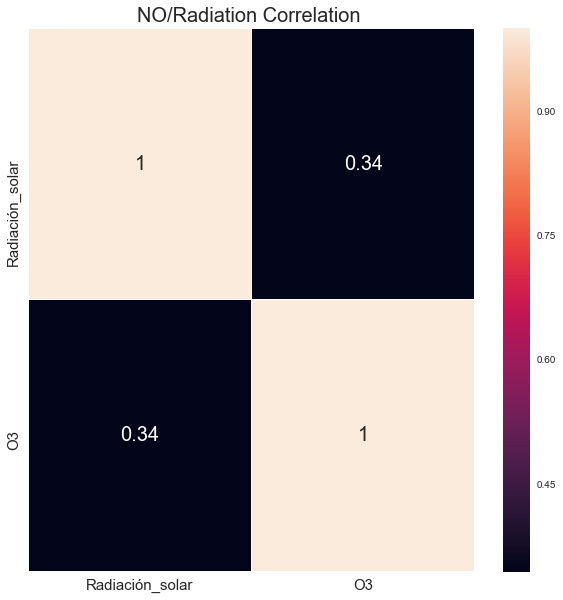

In [108]:
# correlation between irradation and NO
df_result_df.columns=['Radiación_solar','O3']

corrMatrix_meteo_df = df_result_df.corr()
fig, ax = plt.subplots(figsize=(10,10))     
sn.heatmap(corrMatrix_meteo_df, annot=True, linewidths=0.1, annot_kws={"size":20})

plt.title('NO/Radiation Correlation ', size=20)

plt.xticks(size=15)
plt.yticks(size=15)
plt.grid(False)
#plt.savefig('12_pollutants_correlation_presentation', dpi=100)
plt.show()







In [98]:
#df_result

,Data,month,day,year,TM,TX,TN,HRM,PPT24H,HPA,...,NO2,O3,PM10,SO2,NOX,H2S,PS,PM2.5,HCNM,HCT
0,1996-01-01,1,1,1996,13.2,17.7,10.0,NaN,0.0,955.9,...,42.291667,23.583333,NaN,12.125000,NaN,NaN,27.416667,NaN,NaN,NaN
1,1996-02-01,2,1,1996,11.3,15.4,9.2,NaN,0.0,965.6,...,44.800892,22.376812,NaN,12.229167,NaN,NaN,41.520833,NaN,NaN,NaN
2,1996-03-01,3,1,1996,9.9,14.7,6.6,63.0,0.0,969.9,...,64.430556,9.680556,NaN,12.083333,NaN,NaN,70.062500,NaN,NaN,NaN
3,1996-04-01,4,1,1996,10.3,12.5,NaN,63.0,0.0,967.0,...,61.208333,10.305556,NaN,13.145833,NaN,NaN,54.062500,NaN,NaN,NaN
4,1996-05-01,5,1,1996,9.8,13.3,6.6,87.0,1.2,956.0,...,37.833333,38.041667,NaN,15.083333,NaN,NaN,40.333333,NaN,NaN,NaN
5,1996-06-01,6,1,1996,9.7,16.1,5.2,79.0,2.8,954.4,...,39.012121,33.987689,NaN,11.000000,NaN,NaN,33.520833,NaN,NaN,NaN
6,1996-07-01,7,1,1996,11.0,16.1,8.5,76.0,0.0,958.2,...,55.671943,35.497241,NaN,11.125000,NaN,NaN,45.791667,NaN,NaN,NaN
7,1996-08-01,8,1,1996,10.7,17.7,7.2,73.0,0.0,966.1,...,53.081324,25.033333,NaN,11.083333,NaN,NaN,51.020833,NaN,NaN,NaN
8,1996-09-01,9,1,1996,11.5,14.7,NaN,98.0,9.0,959.0,...,43.367424,49.463068,NaN,11.000000,NaN,NaN,27.354167,NaN,NaN,NaN
9,1996-10-01,10,1,1996,8.8,12.1,7.5,99.0,12.0,957.6,...,37.218478,36.294686,NaN,11.000000,NaN,NaN,39.437500,NaN,NaN,NaN


<html>
<head>
<title></title>
</head>
<body>

<h2><u>Overview of data</u></h2>
<p><u> Indexing Time Series</u></p>

</body>
</html>

In [24]:
index_data = df_result.set_index('Data')
#index_data

<html>
<head>
<title></title>
</head>
<body>

<h2>Individual analysis of each of the variables</h2>
<p><u></u></p>

</body>
</html>

In [25]:
#index_data.columns
#index_data.isnull()

In [26]:
y_tm = index_data['TM']    #Temperatura mitjana diària (ºC)
y_tx = index_data['TX']    #Temperatura màxima diària (ºC)
y_tn = index_data['TN']    #Temperatura mínima diària (ºC)
y_hmr = index_data['HRM']    #Humitat relativa mitjana diària (%)
y_ppt24h = index_data['PPT24H']    #Precipitació acumulada diària
y_hpa = index_data['HPA']    #Pressió atmosfèrica mitjana diària (valor no corregit a nivell del mar) (hPa)
y_rs24h = index_data['RS24H']    #Irradiació solar global diària (MJ/m2)
y_vvm10 = index_data['VVM10']    #Velocitat mitjana diària del vent (sensors a 10 m) (m/s)
y_dvm10 = index_data['DVM10']    #Direcció mitjana diària del vent (sensors a 10 m) (º)
y_vvx10 = index_data['VVX10']    #Ratxa màxima diària del vent 10 m (m/s)
y_dvx10 = index_data['DVX10']     #Direcció de la ratxa màx. diària de vent 10 m (º)
y_co = index_data['CO']    #El monóxido de carbono, también denominado óxido de carbono
y_no = index_data['NO']    #El óxido de nitrógeno (II), óxido nítrico o monóxido de nitrógeno
y_no2 = index_data['NO2']    #El dióxido de nitrógeno u óxido de nitrógeno
y_o3 = index_data['O3']    # ozono
y_pm10 = index_data['PM10']    #pequeñas partículas sólidas o líquidas de polvo, cenizas, hollín
y_so2 = index_data['SO2']    #El dióxido de azufre, u óxido de azufre (IV),
y_nox = index_data['NOX']    # compuestos químicos binarios gaseosos formados por la combinación de oxígeno y nitrógeno.
y_h2s = index_data['H2S']    #El ácido sulfhídrico en disolución acuosa, es un hidrácido de fórmula H₂S
y_ps = index_data['PS']    #Un pseudohalógeno (que significa "falso" halógeno) es un compuesto inorgánico
y_pm25 = index_data['PM2.5']
y_hcnm = index_data['HCNM']
y_hct = index_data['HCT']



<html>
<head>
<title></title>
</head>
<body>

<h2>Analisis de las temperaturas media, maxima y minima</h2>
<p><u>  </u></p>

</body>
</html>

<html>
<head>
<title></title>
</head>
<body>

<h4>Maximum, minimum and median Temperatures </h4>
<p><u>  </u></p>

</body>
</html>

In [27]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
#data['month'] = data.index.month
#data['year'] = data.index.year
pivot_avg_tempe_tm = pd.pivot_table(index_data, values='TM', index='year',  aggfunc='mean')
pivot_avg_tempe_tm['2 years trend'] = pivot_avg_tempe_tm['TM'].rolling(2).mean()
pivot_avg_tempe_tx = pd.pivot_table(index_data, values='TX', index='year',  aggfunc='mean')
pivot_avg_tempe_tn = pd.pivot_table(index_data, values='TN', index='year',  aggfunc='mean')

#pivot_tm.plot(figsize=(20,6))
#plt.title('Yearly Temperature Average Variation ')
#plt.xlabel('Months')
#plt.ylabel('Yearly Temperature Average')
#plt.xticks([x for x in range(2008,2019,2)])
#plt.legend().remove()
#plt.show()

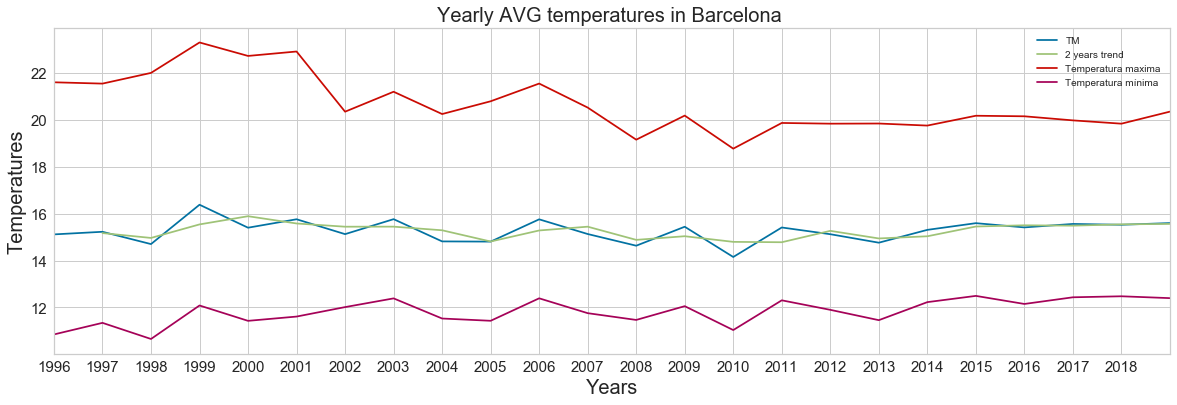

In [28]:
sns.color_palette("Paired")
pivot_avg_tempe_tm[['TM','2 years trend']].plot(figsize=(20,6), label='Temperatura media', legend= True)
pivot_avg_tempe_tx.TX.plot(figsize=(20,6), label='Temperatura maxima', legend= True)
pivot_avg_tempe_tn.TN.plot(figsize=(20,6), label='Temperatura mínima', legend= True)

plt.yticks(size = 15)
plt.title('Yearly AVG temperatures in Barcelona ', size=20)
plt.xlabel('Years', size=20)
plt.ylabel('Temperatures', size=20)
plt.xticks([x for x in range(1996,2019,1)], size=15)
#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')
plt.show()

<html>
<head>
<title></title>
</head>
<body>

<h4>2. Trend by month </h4>
<p><u>  </u></p>

</body>
</html>

In [29]:
monthly_seasonality_tm = pivot_avg_tempe_tm.mean(axis=1)
#monthly_seasonality_tm.plot(figsize=(20,6))
#plt.title('Monthly Temperatures in Barcelona since 1996')
#plt.xlabel('Months')
#plt.ylabel('Temperature')
#plt.xticks([x for x in range(1,13)])
#plt.show()

<html>
<head>
<title></title>
</head>
<body>

<h4>3. Trend by year </h4>
<p><u>  </u></p>

</body>
</html>

In [30]:
## temepratura media
year_avg_tm = pd.pivot_table(index_data, values='TM', index='year', aggfunc='mean')
year_avg_tm['6 month MA'] = year_avg_tm['TM'].rolling(2).mean()
#year_avg_tm[['TM','6 month MA']].plot(figsize=(20,6))
#plt.title('Yearly AVG Temperatures in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('Temperature')
#plt.xticks([x for x in range(1996,2019,2)])
#plt.show()

In [31]:
#temperatura máxima
year_avg_tx = pd.pivot_table(index_data, values='TX', index='year', aggfunc='mean')
#year_avg_tx['6 month MA'] = year_avg_tx['TX'].rolling(2).mean()
#year_avg_tx[['TX','6 month MA']].plot(figsize=(20,6))
#plt.title('Yearly AVG Temperatures in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('Temperature')
#plt.xticks([x for x in range(2008,2019,1)])
#plt.show()

## aquí hay algo, calcular el cambio de la temepratura mínima

# Analisis de los contaminantes
<html>
<head>
<title></title>
</head>
<body>

<h3>1. Analisis de CO </h3>
<p><u>  </u></p>

</body>
</html>

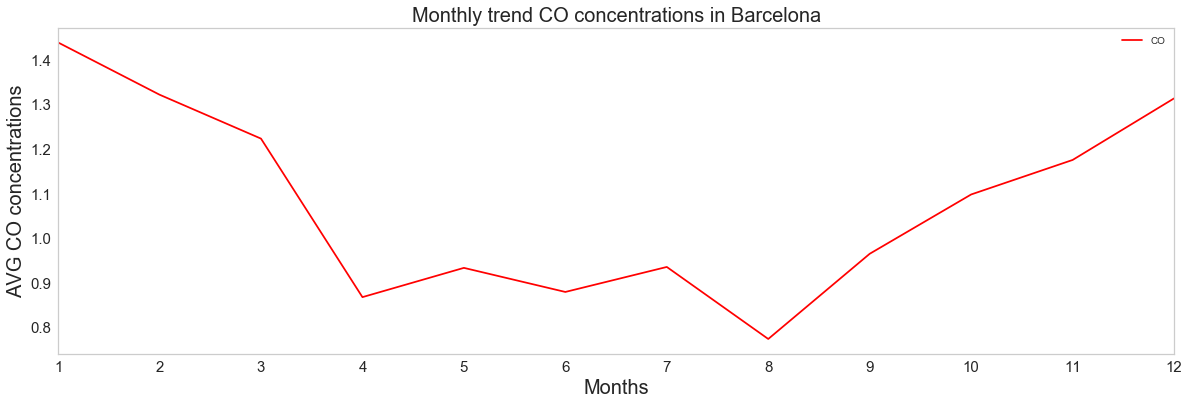

In [74]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
data_contaminantes['month'] = pd.DatetimeIndex(data_contaminantes['Data']).month
df_result['day'] = pd.DatetimeIndex(df_result['Data']).day
data_contaminantes['year'] = pd.DatetimeIndex(data_contaminantes['Data']).year
pivot_co = pd.pivot_table(data_contaminantes, values='CO', index='month', columns='year', aggfunc='mean')
#pivot_co.plot(figsize=(20,6))
#plt.title('Yearly CO concentration ')
#plt.xlabel('Months')
#plt.ylabel('CO concentrations (mg/m^3)')
#plt.xticks([x for x in range(1,13)])
#plt.legend().remove()
#plt.show()
#######
monthly_seasonality_co = pivot_co.mean(axis=1)
monthly_seasonality_co.plot(figsize=(20,6), label='CO', legend= True, color='red')
plt.title('Monthly trend CO concentrations in Barcelona', size=20)
plt.xlabel('Months', size=20)
plt.ylabel('AVG CO concentrations', size=20)
plt.xticks([x for x in range(1,13)], size=15)
plt.yticks(size=15)
plt.grid(False)
plt.savefig('009_trend_CO_Barcelona_presentation.png', dpi=210)
plt.show()





########
year_avg_co = pd.pivot_table(index_data, values='CO', index='year', aggfunc='mean')
#year_avg_co['2 Years AVG'] = year_avg_co['CO'].rolling(2).mean()
#year_avg_co[['CO','2 Years AVG']].plot(figsize=(20,6))
#plt.title('Yearly AVG CO in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('CO')
#plt.xticks([x for x in range(1996,2019,2)])
#plt.show()

In [35]:
#year_avg_co

# diferentes niveles de CO por estación

global_temp = df_result[['Data', 'CO']]

global_temp['Data'] = pd.to_datetime(global_temp['Data'])
global_temp['year'] = global_temp['Data'].map(lambda x: x.year)
global_temp['month'] = global_temp['Data'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['CO'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['CO'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['CO'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['CO'].mean())


## verano

# sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))


plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
#plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
#plt.plot(years, spring_temps, label='Springs average temperature', color='g')
#plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)
plt.yticks([x for x in range(0,1,1)])

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season in Barcelona')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

## otoño

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))


#plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
#plt.plot(years, spring_temps, label='Springs average temperature', color='g')
#plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)
plt.yticks([x for x in range(0,1,1)])

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season in Barcelona')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

## Primavera

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))


#plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
#plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
#plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)
plt.yticks([x for x in range(0,1,1)])

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season in Barcelona')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

## Invierno

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))


#plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
#plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
#plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)
plt.yticks([x for x in range(0,1,1)])

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season in Barcelona')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

## 2. NO analisis

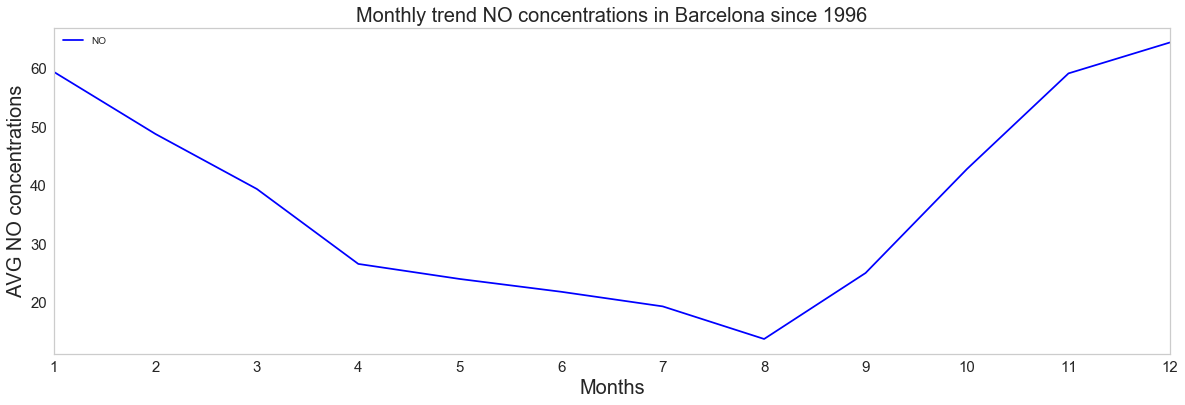

In [36]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
#data['month'] = data.index.month
#data['year'] = data.index.year
pivot_no = pd.pivot_table(data_contaminantes, values='NO', index='month', columns='year', aggfunc='mean')
#pivot_no.plot(figsize=(20,6))
#plt.title('Yearly NO Average Variation ')
#plt.xlabel('Months')
#plt.ylabel('Yearly AVG NO in Barcelona ug/m^3')
#plt.xticks([x for x in range(1,13)])
#plt.legend().remove()
#plt.show()
#########
monthly_seasonality_no = pivot_no.mean(axis=1)
monthly_seasonality_no.plot(figsize=(20,6), label='NO',  legend= True, color='blue')
plt.title('Monthly trend NO concentrations in Barcelona since 1996', size=20)
plt.xlabel('Months', size=20)
plt.ylabel('AVG NO concentrations', size=20)
plt.xticks([x for x in range(1,13)], size=15)
plt.yticks(size=15)
plt.grid(False)
plt.savefig('010_trend_NO_Barcelona_presentation.png', dpi=210)
plt.show()


##########
year_avg_no = pd.pivot_table(index_data, values='NO', index='year', aggfunc='mean')
#year_avg_no['2 years MA'] = year_avg_no['NO'].rolling(2).mean()
#year_avg_no[['NO','2 years MA']].plot(figsize=(20,6))
#plt.title('Yearly AVG NO in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('AVG NO concentrations')
#plt.xticks([x for x in range(1996,2020,1)])
#plt.show()

In [37]:
#year_avg_no

## 3. NO2

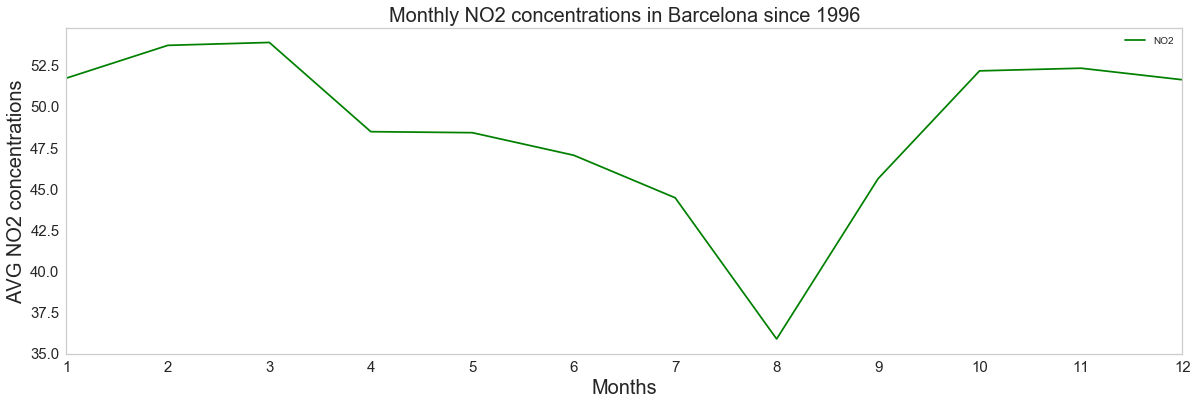

In [38]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
#data['month'] = data.index.month
#data['year'] = data.index.year
pivot_no2 = pd.pivot_table(data_contaminantes, values='NO2', index='month', columns='year', aggfunc='mean')
#pivot_no2.plot(figsize=(20,6))
#plt.title('Yearly NO2 concentrations Average Variation ')
#plt.xlabel('Months')
#plt.ylabel('NO2 concentrations Average')
#plt.xticks([x for x in range(1,13)])
#plt.legend().remove()
#plt.show()
######
monthly_seasonality_no2 = pivot_no2.mean(axis=1)
monthly_seasonality_no2.plot(figsize=(20,6), label='NO2', legend= True,  color='green')
plt.title('Monthly NO2 concentrations in Barcelona since 1996', size=20)
plt.xlabel('Months', size=20)
plt.ylabel('AVG NO2 concentrations', size=20)
plt.xticks([x for x in range(1,13)], size=15)
plt.yticks( size=15)
plt.grid(False)
plt.savefig('010_trend_NO2_Barcelona_presentation.png', dpi=210)
plt.show()

########
year_avg_no2 = pd.pivot_table(index_data, values='NO2', index='year', aggfunc='mean')
#year_avg_no2['2 years MA'] = year_avg_no2['NO2'].rolling(2).mean()
#year_avg_no2[['NO2','2 years MA']].plot(figsize=(20,6))
#plt.title('Yearly AVG NO2 concentrations in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('AVG NO2 concentrations')
#plt.xticks([x for x in range(1996,2020,1)])
#plt.show()

In [39]:
#year_avg_no2

## 4. O3

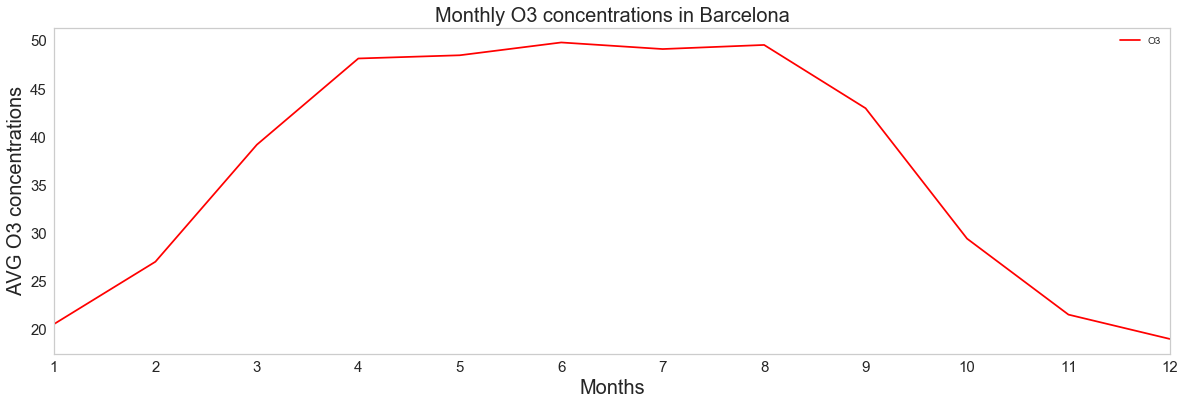

In [40]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
#data['month'] = data.index.month
#data['year'] = data.index.year
pivot_o3 = pd.pivot_table(index_data, values='O3', index='month', columns='year', aggfunc='mean')
#pivot_o3.plot(figsize=(20,6))
#plt.title('Yearly O3 concentration ')
#plt.xlabel('Months')
#plt.ylabel('CO2 concentrations (mg/m^3)')
#plt.xticks([x for x in range(1,13)])
#plt.legend().remove()
#plt.show()
#########
monthly_seasonality_o3 = pivot_o3.mean(axis=1)
monthly_seasonality_o3.plot(figsize=(20,6), label='O3', legend=True, color='red')
plt.title('Monthly O3 concentrations in Barcelona', size=20)
plt.xlabel('Months', size=20)
plt.ylabel('AVG O3 concentrations', size=20)
plt.xticks([x for x in range(1,13)], size=15)
plt.yticks(size=15)
plt.grid(False)
plt.savefig('010_trend_O3_Barcelona_presentation.png', dpi=210)

plt.show()

##########
year_avg_o3 = pd.pivot_table(index_data, values='O3', index='year', aggfunc='mean')
#year_avg_o3['2 years MA'] = year_avg_o3['O3'].rolling(2).mean()
#year_avg_o3[['O3','2 years MA']].plot(figsize=(20,6))
#plt.title('Yearly AVG O3 concentrations in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('AVG O3 concentrations')
#plt.xticks([x for x in range(1996,2020,1)])
#plt.show()

In [41]:
#year_avg_o3

## 5. PM10

In [42]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
#data['month'] = data.index.month
#data['year'] = data.index.year
#pivot_pm10 = pd.pivot_table(index_data, values='PM10', index='month', columns='year', aggfunc='mean')
#pivot_pm10.plot(figsize=(20,6))
#plt.title('Yearly PM10 concentration ')
#plt.xlabel('Months')
#plt.ylabel('PM10 concentrations (mg/m^3)')
#plt.xticks([x for x in range(1,13)])
#plt.legend().remove()
#plt.show()
########
#monthly_seasonality_pm10 = pivot_pm10.mean(axis=1)
#monthly_seasonality_pm10.plot(figsize=(20,6))
#plt.title('Monthly PM10 concentrations in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('PM10 AVG')
#plt.xticks([x for x in range(1,13)])
#plt.show()
#########
year_avg_pm10 = pd.pivot_table(index_data, values='PM10', index='year', aggfunc='mean')
#year_avg_pm10['2 years MA'] = year_avg_pm10['PM10'].rolling(2).mean()
#year_avg_pm10[['PM10','2 years MA']].plot(figsize=(20,6))
#plt.title('Yearly AVG Temperatures in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('Temperature')
#plt.xticks([x for x in range(1998,2020,1)])
#plt.show()

## 6.SO2

In [43]:
#pivot_so2 = pd.pivot_table(index_data, values='SO2', index='month', columns='year', aggfunc='mean')
#pivot_so2.plot(figsize=(20,6))
#plt.title('Yearly SO2 concentration ')
#plt.xlabel('Months')
#plt.ylabel('SO2 concentrations (ug/m^3)')
#plt.xticks([x for x in range(1,13)])
#plt.legend().remove()
#plt.show()
########
#monthly_seasonality_so2 = pivot_so2.mean(axis=1)
#monthly_seasonality_so2.plot(figsize=(20,6))
#plt.title('Monthly SO2 concentrations in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('AVG SO2 concentrations')
#plt.xticks([x for x in range(1,13)])
#plt.show()
#########

year_avg_so2 = pd.pivot_table(index_data, values='SO2', index='year', aggfunc='mean')
#year_avg_so2['2 years MA'] = year_avg_so2['SO2'].rolling(2).mean()
#year_avg_so2[['SO2','2 years MA']].plot(figsize=(20,6))
#plt.title('Yearly AVG SO2 concentration in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('AVG SO2 concentrations')
#plt.xticks([x for x in range(1996,2020,1)])
#plt.show()
#######


## 7.NOX

In [44]:
#pivot_nox = pd.pivot_table(index_data, values='NOX', index='month', columns='year', aggfunc='mean')
#pivot_nox.plot(figsize=(20,6))
#plt.title('Yearly NOX concentration ')
#plt.xlabel('Months')
#plt.ylabel('NOX concentrations (ug/m^3)')
#plt.xticks([x for x in range(1,13)])
#plt.legend().remove()
#plt.show()
########
#monthly_seasonality_nox = pivot_nox.mean(axis=1)
#monthly_seasonality_nox.plot(figsize=(20,6))
#plt.title('Monthly NOX concentrations in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('AVG NOX concentrations')
#plt.xticks([x for x in range(1,13)])
#plt.show()
#########
year_avg_nox = pd.pivot_table(index_data, values='NOX', index='year', aggfunc='mean')
#year_avg_nox['2 years MA'] = year_avg_nox['NOX'].rolling(2).mean()
#year_avg_nox[['NOX','2 years MA']].plot(figsize=(20,6))
#plt.title('Yearly AVG Temperatures in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('Temperature')
##plt.xticks([x for x in range(2007,2020,1)])
#plt.show()

## todos los contamianantes en una gráfica desde 1996

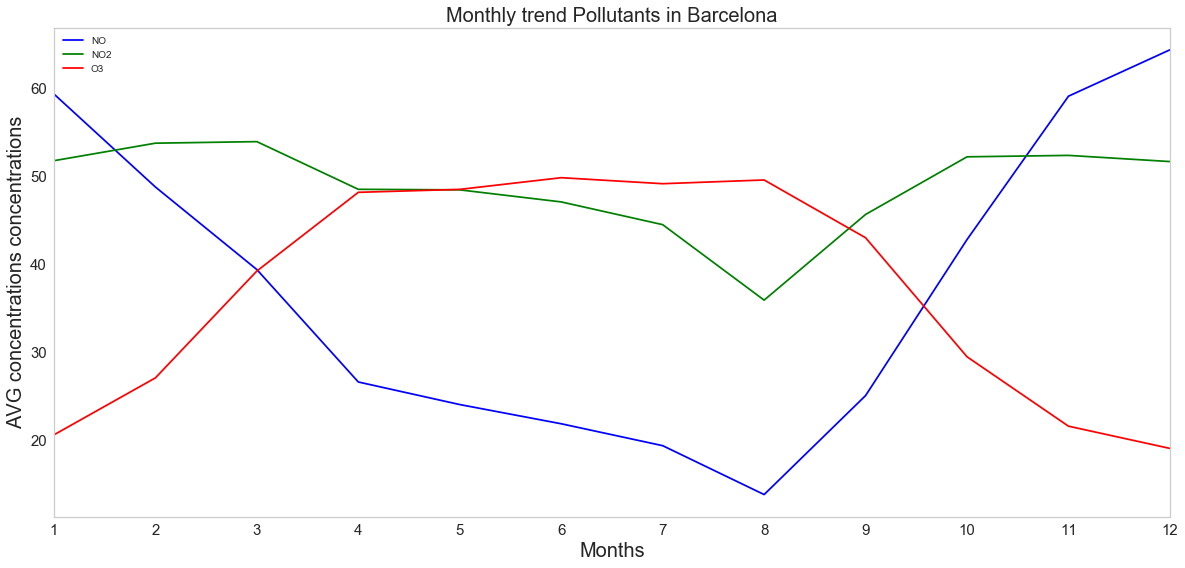

In [73]:
#monthly_seasonality_co.plot(figsize=(20,9), label='CO Trend', legend= True, color='red')
monthly_seasonality_no.plot(figsize=(20,9), label='NO',  legend= True, color='blue')
monthly_seasonality_no2.plot(figsize=(20,9), label='NO2', legend= True,  color='green')
monthly_seasonality_o3.plot(figsize=(20,9), label='O3', legend=True, color='red')
plt.title('Monthly trend Pollutants in Barcelona', size=20)
plt.xlabel('Months', size=20)
plt.ylabel('AVG concentrations concentrations', size=20)
plt.xticks([x for x in range(1,13)], size=15)
plt.yticks(size=15)
plt.grid(False)
plt.savefig('100_pollutants_monthly_trend_Barcelona_presentation.png', dpi=200)
plt.show()


## concentración de CO, en otra grafica porque son otra unidades

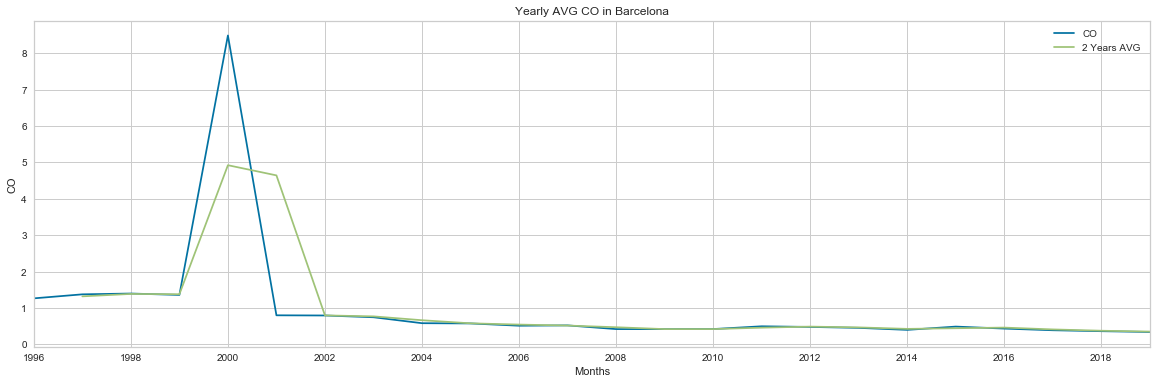

In [45]:
year_avg_co = pd.pivot_table(index_data, values='CO', index='year', aggfunc='mean')
year_avg_co['2 Years AVG'] = year_avg_co['CO'].rolling(2).mean()
year_avg_co[['CO','2 Years AVG']].plot(figsize=(20,6))
plt.title('Yearly AVG CO in Barcelona')
plt.xlabel('Months')
plt.ylabel('CO')
plt.xticks([x for x in range(1996,2019,2)])
plt.show()

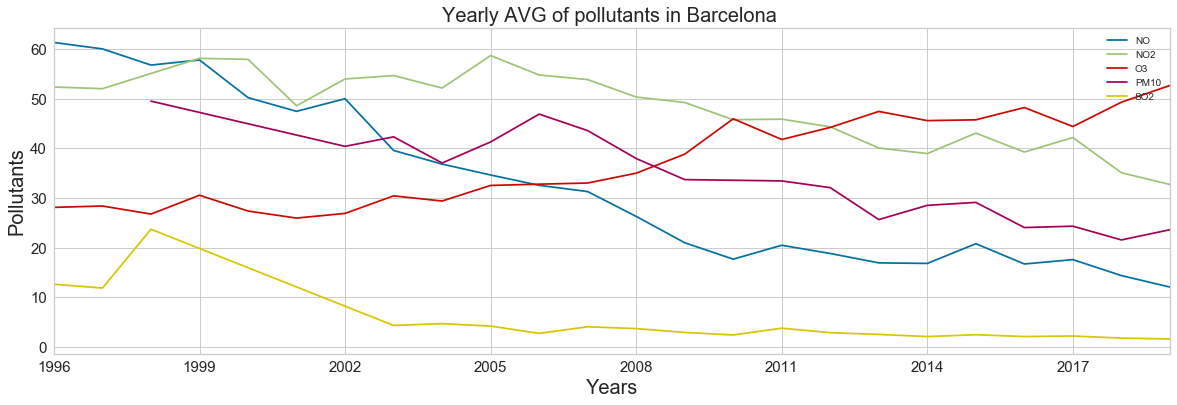

In [46]:
sns.color_palette("Paired")
#year_avg_nox.NOX.plot(figsize=(20,6), label='NOX', legend= True)
year_avg_no.NO.plot(figsize=(20,6), label='NO', legend= True)
year_avg_no2.NO2.plot(figsize=(20,6), label='NO2', legend= True)
year_avg_o3.O3.plot(figsize=(20,6), label='O3', legend= True)
year_avg_pm10.PM10.plot(figsize=(20,6), label='PM10', legend= True)
year_avg_so2.SO2.plot(figsize=(20,6), label='SO2', legend= True)


plt.yticks(size = 15)
plt.title('Yearly AVG of pollutants in Barcelona ', size=20)
plt.xlabel('Years', size=20)
plt.ylabel('Pollutants', size=20)
plt.xticks([x for x in range(1996,2019,3)], size=15)
#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')
plt.show()

In [ ]:
## Grafica de los contamianates por porcentages

In [47]:
index_df=index_data.copy()
#index_df

In [48]:
#cambiar la vista a los ultimo 10 años
#index_data
index_df =index_df[(index_df.index >= '2001-01-01')&(index_df.index <= '2019-12-31')]

In [49]:
year_avg_grap_co = pd.pivot_table(index_df, values='CO', index='year', aggfunc='mean')
year_avg_grap_no = pd.pivot_table(index_df, values='NO', index='year', aggfunc='mean')
year_avg_grap_no2 = pd.pivot_table(index_df, values='NO2', index='year', aggfunc='mean')
year_avg_grap_o3 = pd.pivot_table(index_df, values='O3', index='year', aggfunc='mean')
year_avg_grap_pm10 = pd.pivot_table(index_df, values='PM10', index='year', aggfunc='mean')
year_avg_grap_so2 = pd.pivot_table(index_df, values='SO2', index='year', aggfunc='mean')
year_avg_grap_nox = pd.pivot_table(index_df, values='NOX', index='year', aggfunc='mean')

In [50]:

#year_avg_grap_co

In [51]:
#year_avg_grap_pm10
#year_avg_grap_o3

In [52]:
cond_co = year_avg_grap_co.index == 2001
cond_no = year_avg_grap_no.index == 2001
cond_no2 = year_avg_grap_no2.index == 2001
cond_o3 = year_avg_grap_o3.index == 2001
cond_pm10 = year_avg_grap_pm10.index == 2002
cond_so2 = year_avg_grap_so2.index == 2001
cond_nox = year_avg_grap_nox.index == 2001

# calculate value to subtract
first_co = year_avg_grap_co['CO'].where(cond_co).ffill().mask(cond_co)
first_no = year_avg_grap_no['NO'].where(cond_no).ffill().mask(cond_no)
first_no2 = year_avg_grap_no2['NO2'].where(cond_no2).ffill().mask(cond_no2)
first_o3 = year_avg_grap_o3['O3'].where(cond_o3).ffill().mask(cond_o3)
first_pm10 = year_avg_grap_pm10['PM10'].where(cond_pm10).ffill().mask(cond_pm10)
first_so2 = year_avg_grap_so2['SO2'].where(cond_so2).ffill().mask(cond_so2)
first_nox = year_avg_grap_nox['NOX'].where(cond_nox).ffill().mask(cond_nox)

# perform calculation
year_avg_grap_co['CO_percentage'] = ((year_avg_grap_co['CO'] - first_co) / first_co)*100
year_avg_grap_no['NO_percentage'] = ((year_avg_grap_no['NO'] - first_no) / first_no)*100
year_avg_grap_no2['NO2_percentage'] = ((year_avg_grap_no2['NO2'] - first_no2) / first_no2)*100
year_avg_grap_o3['O3_percentage'] = ((year_avg_grap_o3['O3'] - first_o3) / first_o3)*100
year_avg_grap_pm10['PM10_percentage'] = ((year_avg_grap_pm10['PM10'] - first_pm10) / first_pm10)*100
year_avg_grap_so2['SO2_percentage'] = ((year_avg_grap_so2['SO2'] - first_so2) / first_so2)*100
year_avg_grap_nox['NOX_percentage'] = ((year_avg_grap_nox['NOX'] - first_nox) / first_nox)*100

## Convertir la primera posición de NAN a cero

In [53]:
year_avg_grap_co['CO_percentage'] = year_avg_grap_co['CO_percentage'].fillna(0)
year_avg_grap_no['NO_percentage'] = year_avg_grap_no['NO_percentage'].fillna(0)
year_avg_grap_no2['NO2_percentage'] = year_avg_grap_no2['NO2_percentage'].fillna(0)
year_avg_grap_o3['O3_percentage'] = year_avg_grap_o3['O3_percentage'].fillna(0)
year_avg_grap_pm10['PM10_percentage'] = year_avg_grap_pm10['PM10_percentage'].fillna(0)
year_avg_grap_so2['SO2_percentage'] = year_avg_grap_so2['SO2_percentage'].fillna(0)
year_avg_grap_nox['NOX_percentage'] = year_avg_grap_nox['NOX_percentage'].fillna(0)

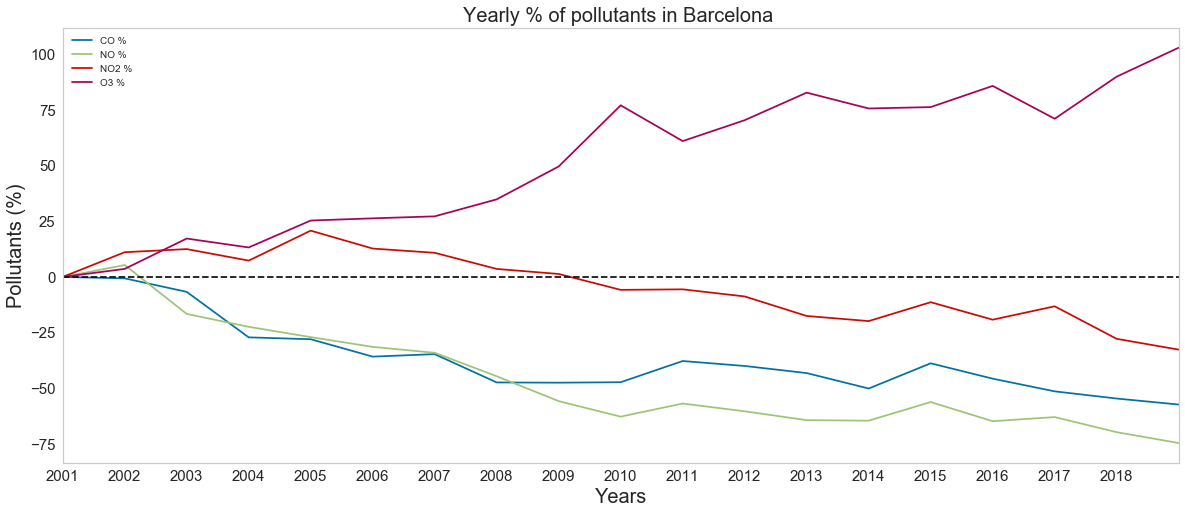

In [54]:
import seaborn as sns
sns.color_palette("Paired")
year_avg_grap_co.CO_percentage.plot(figsize=(20,8), label='CO %', legend= True)
year_avg_grap_no.NO_percentage.plot(figsize=(20,8), label='NO %', legend= True)
year_avg_grap_no2.NO2_percentage.plot(figsize=(20,8), label='NO2 %', legend= True)
year_avg_grap_o3.O3_percentage.plot(figsize=(20,8), label='O3 %', legend= True)
#year_avg_grap_pm10.PM10_percentage.plot(figsize=(20,8), label='PM10 %', legend= True)
#year_avg_grap_so2.SO2_percentage.plot(figsize=(20,7), label='SO2', legend= True)
#year_avg_grap_nox.NOX_percentage.plot(figsize=(20,7), label='NOX', legend= True)


plt.yticks(size = 15)
plt.title('Yearly % of pollutants in Barcelona ', size=20)
plt.xlabel('Years', size=20)
plt.ylabel('Pollutants (%)', size=20)
plt.xticks([x for x in range(2001,2019,1)], size=15)
plt.axhline(y=0, color='k', linestyle='--')
plt.grid(False)
plt.savefig('004_Yearly % of pollutants in Barcelona_presentation.png', dpi=210)
plt.show()

In [109]:
## analisis de lluvias

### Lluvias por dias

### lluvias


In [55]:
data_meteo.dtypes

TM        float64
TX        float64
TN        float64
HRM       float64
PPT24H    float64
HPA       float64
RS24H     float64
VVM10     float64
DVM10     float64
VVX10     float64
DVX10     float64
Data       object
dtype: object

In [56]:
data_lluvias=data_meteo[['Data','PPT24H']]
data_lluvias['Data'] = pd.to_datetime(data_lluvias['Data'])



In [57]:
print ('años más lluviosos: \n',data_lluvias.nlargest(10, ['PPT24H'])) 

años más lluviosos: 
            Data  PPT24H
8354 2018-11-15   139.9
2473 2002-09-10   128.8
1067 1998-03-12   106.4
6845 2014-09-28    95.3
7962 2017-10-19    94.3
3908 2006-09-13    93.0
7753 2017-03-24    92.2
5549 2011-12-03    91.6
8738 2019-04-12    88.0
2403 2002-07-31    79.8


In [58]:
data_lluvias=data_lluvias.set_index('Data')
data_lluvias['mes']=data_lluvias.index.month
data_lluvias['dia']=data_lluvias.index.day
data_lluvias['año']=data_lluvias.index.year

In [59]:
#data_lluvias

In [60]:
lluvias_1996=data_lluvias[(data_lluvias.index >= "1996-01-01") & (data_lluvias.index <= "1996-12-31")]
lluvias_1997=data_lluvias[(data_lluvias.index >= "1997-01-01") & (data_lluvias.index <= "1997-12-31")]
lluvias_1998=data_lluvias[(data_lluvias.index >= "1998-01-01") & (data_lluvias.index <= "1998-12-31")]
lluvias_1999=data_lluvias[(data_lluvias.index >= "1999-01-01") & (data_lluvias.index <= "1999-12-31")]
lluvias_2000=data_lluvias[(data_lluvias.index >= "2000-01-01") & (data_lluvias.index <= "2000-12-31")]
lluvias_2001=data_lluvias[(data_lluvias.index >= "2001-01-01") & (data_lluvias.index <= "2001-12-31")]
lluvias_2002=data_lluvias[(data_lluvias.index >= "2002-01-01") & (data_lluvias.index <= "2002-12-31")]
lluvias_2003=data_lluvias[(data_lluvias.index >= "2003-01-01") & (data_lluvias.index <= "2003-12-31")]
lluvias_2004=data_lluvias[(data_lluvias.index >= "2004-01-01") & (data_lluvias.index <= "2004-12-31")]
lluvias_2005=data_lluvias[(data_lluvias.index >= "2005-01-01") & (data_lluvias.index <= "2005-12-31")]
lluvias_2006=data_lluvias[(data_lluvias.index >= "2006-01-01") & (data_lluvias.index <= "2006-12-31")]
lluvias_2007=data_lluvias[(data_lluvias.index >= "2007-01-01") & (data_lluvias.index <= "2007-12-31")]
lluvias_2008=data_lluvias[(data_lluvias.index >= "2008-01-01") & (data_lluvias.index <= "2008-12-31")]
lluvias_2009=data_lluvias[(data_lluvias.index >= "2009-01-01") & (data_lluvias.index <= "2009-12-31")]
lluvias_2010=data_lluvias[(data_lluvias.index >= "2010-01-01") & (data_lluvias.index <= "2010-12-31")]
lluvias_2011=data_lluvias[(data_lluvias.index >= "2011-01-01") & (data_lluvias.index <= "2011-12-31")]
lluvias_2012=data_lluvias[(data_lluvias.index >= "2012-01-01") & (data_lluvias.index <= "2012-12-31")]
lluvias_2013=data_lluvias[(data_lluvias.index >= "2013-01-01") & (data_lluvias.index <= "2013-12-31")]
lluvias_2014=data_lluvias[(data_lluvias.index >= "2014-01-01") & (data_lluvias.index <= "2014-12-31")]
lluvias_2015=data_lluvias[(data_lluvias.index >= "2015-01-01") & (data_lluvias.index <= "2015-12-31")]
lluvias_2016=data_lluvias[(data_lluvias.index >= "2016-01-01") & (data_lluvias.index <= "2016-12-31")]
lluvias_2017=data_lluvias[(data_lluvias.index >= "2017-01-01") & (data_lluvias.index <= "2017-12-31")]
lluvias_2018=data_lluvias[(data_lluvias.index >= "2018-01-01") & (data_lluvias.index <= "2018-12-31")]
lluvias_2019=data_lluvias[(data_lluvias.index >= "2019-01-01") & (data_lluvias.index <= "2019-12-31")]



In [61]:
print(lluvias_1996.shape)
print(lluvias_2002.shape)
print(lluvias_2018.shape)


(366, 4)
(365, 4)
(365, 4)


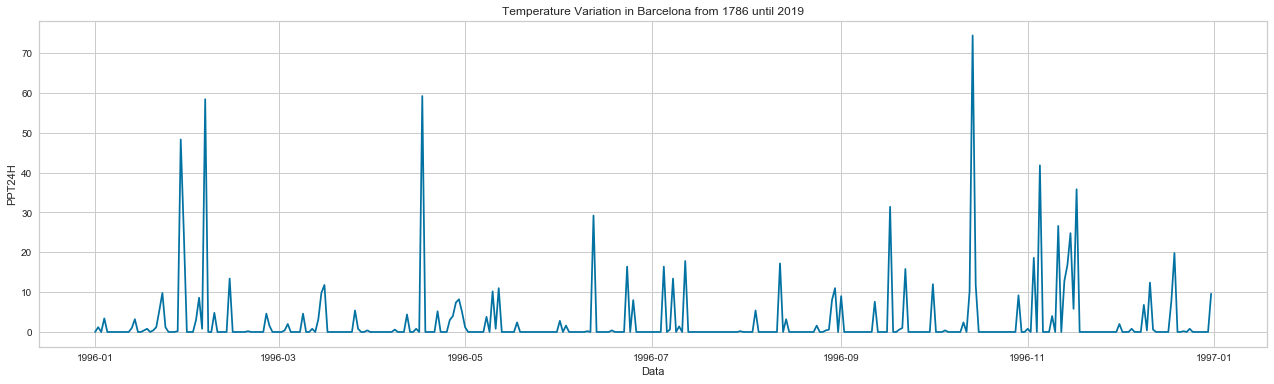

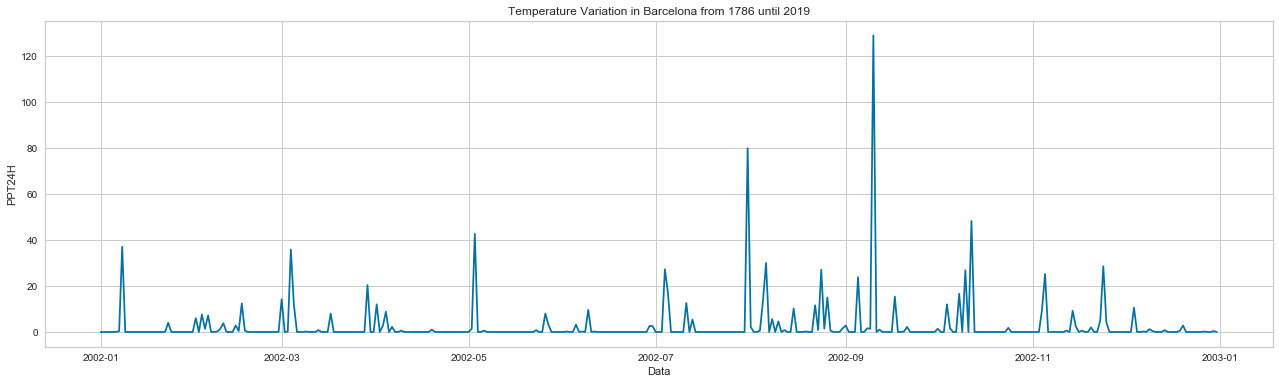

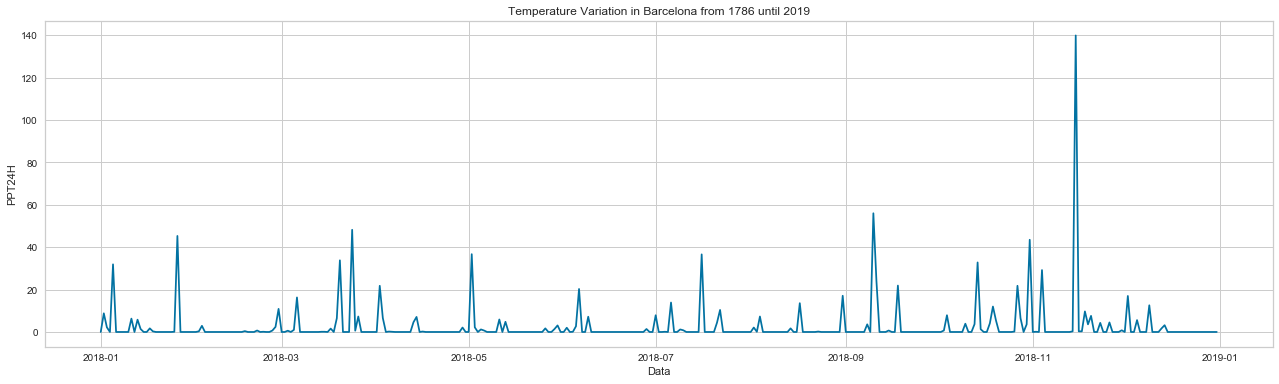

In [62]:
plt.figure(figsize=(22,6))
sns.lineplot(x=lluvias_1996.index, y=lluvias_1996['PPT24H'])
plt.title('Temperature Variation in Barcelona from 1786 until 2019')
plt.show()
####
plt.figure(figsize=(22,6))
sns.lineplot(x=lluvias_2002.index, y=lluvias_2002['PPT24H'])
plt.title('Temperature Variation in Barcelona from 1786 until 2019')
plt.show()
####
plt.figure(figsize=(22,6))
sns.lineplot(x=lluvias_2018.index, y=lluvias_2018['PPT24H'])
plt.title('Temperature Variation in Barcelona from 1786 until 2019')
plt.show()

In [63]:
#DIAS DE LLUVIA EN CADA UNO DE LOS AÑO

In [64]:
print(len(lluvias_1996[(lluvias_1996.PPT24H == 0)])/365)
print(len(lluvias_1997[(lluvias_1997.PPT24H == 0)])/365)
print(len(lluvias_1998[(lluvias_1998.PPT24H == 0)])/365)
print(len(lluvias_1999[(lluvias_1999.PPT24H == 0)])/365)
print(len(lluvias_2000[(lluvias_2000.PPT24H == 0)])/365)
print(len(lluvias_2001[(lluvias_2001.PPT24H == 0)])/365)
print(len(lluvias_2002[(lluvias_2002.PPT24H == 0)])/365)
print(len(lluvias_2003[(lluvias_2003.PPT24H == 0)])/365)
print(len(lluvias_2004[(lluvias_2004.PPT24H == 0)])/365)
print(len(lluvias_2005[(lluvias_2005.PPT24H == 0)])/365)
print(len(lluvias_2006[(lluvias_2006.PPT24H == 0)])/365)
print(len(lluvias_2007[(lluvias_2007.PPT24H == 0)])/365)
print(len(lluvias_2008[(lluvias_2008.PPT24H == 0)])/365)
print(len(lluvias_2009[(lluvias_2009.PPT24H == 0)])/365)
print(len(lluvias_2010[(lluvias_2010.PPT24H == 0)])/365)
print(len(lluvias_2011[(lluvias_2011.PPT24H == 0)])/365)
print(len(lluvias_2012[(lluvias_2012.PPT24H == 0)])/365)
print(len(lluvias_2013[(lluvias_2013.PPT24H == 0)])/365)
print(len(lluvias_2014[(lluvias_2014.PPT24H == 0)])/365)
print(len(lluvias_2015[(lluvias_2015.PPT24H == 0)])/365)
print(len(lluvias_2016[(lluvias_2016.PPT24H == 0)])/365)
print(len(lluvias_2017[(lluvias_2017.PPT24H == 0)])/365)
print(len(lluvias_2018[(lluvias_2018.PPT24H == 0)])/365)
print(len(lluvias_2019[(lluvias_2019.PPT24H == 0)])/365)

0.7178082191780822
0.7917808219178082
0.8356164383561644
0.8191780821917808
0.7890410958904109
0.8191780821917808
0.7342465753424657
0.7671232876712328
0.7616438356164383
0.810958904109589
0.8301369863013699
0.8082191780821918
0.7178082191780822
0.7479452054794521
0.6794520547945205
0.7479452054794521
0.7863013698630137
0.7616438356164383
0.7561643835616438
0.8191780821917808
0.7808219178082192
0.7780821917808219
0.7178082191780822
0.7945205479452054


In [65]:
my_list = [len(lluvias_1996[(lluvias_1996.PPT24H == 0)])/365, 
           len(lluvias_1997[(lluvias_1997.PPT24H == 0)])/365, 
           len(lluvias_1998[(lluvias_1998.PPT24H == 0)])/365,
           len(lluvias_1999[(lluvias_1999.PPT24H == 0)])/365,
           len(lluvias_2000[(lluvias_2000.PPT24H == 0)])/365,
           len(lluvias_2001[(lluvias_2001.PPT24H == 0)])/365,
           len(lluvias_2002[(lluvias_2002.PPT24H == 0)])/365, 
           len(lluvias_2003[(lluvias_2003.PPT24H == 0)])/365,
           len(lluvias_2004[(lluvias_2004.PPT24H == 0)])/365,
           len(lluvias_2005[(lluvias_2005.PPT24H == 0)])/365,
           len(lluvias_2006[(lluvias_2006.PPT24H == 0)])/365,
           len(lluvias_2007[(lluvias_2007.PPT24H == 0)])/365,
           len(lluvias_2008[(lluvias_2008.PPT24H == 0)])/365,
           len(lluvias_2009[(lluvias_2009.PPT24H == 0)])/365, 
           len(lluvias_2010[(lluvias_2010.PPT24H == 0)])/365,
           len(lluvias_2011[(lluvias_2011.PPT24H == 0)])/365,
           len(lluvias_2012[(lluvias_2012.PPT24H == 0)])/365,
           len(lluvias_2013[(lluvias_2013.PPT24H == 0)])/365,
           len(lluvias_2014[(lluvias_2014.PPT24H == 0)])/365,
           len(lluvias_2015[(lluvias_2015.PPT24H == 0)])/365,
           len(lluvias_2016[(lluvias_2016.PPT24H == 0)])/365,
           len(lluvias_2017[(lluvias_2017.PPT24H == 0)])/365,
           len(lluvias_2018[(lluvias_2018.PPT24H == 0)])/365,
           len(lluvias_2019[(lluvias_2019.PPT24H == 0)])/365]








In [66]:
my_list_df={'dry_days': my_list}
dry_years_df = pd.DataFrame(my_list_df, columns = ['dry_days'], index=['1996','1997','1998','1999','2000','2001','2002',
                                                            '2003','2004','2005','2006','2007','2008','2009',
                                                            '2010','2011','2012','2013','2014','2015','2016',
                                                            '2017','2018','2019'])

In [67]:
#dry_years_df

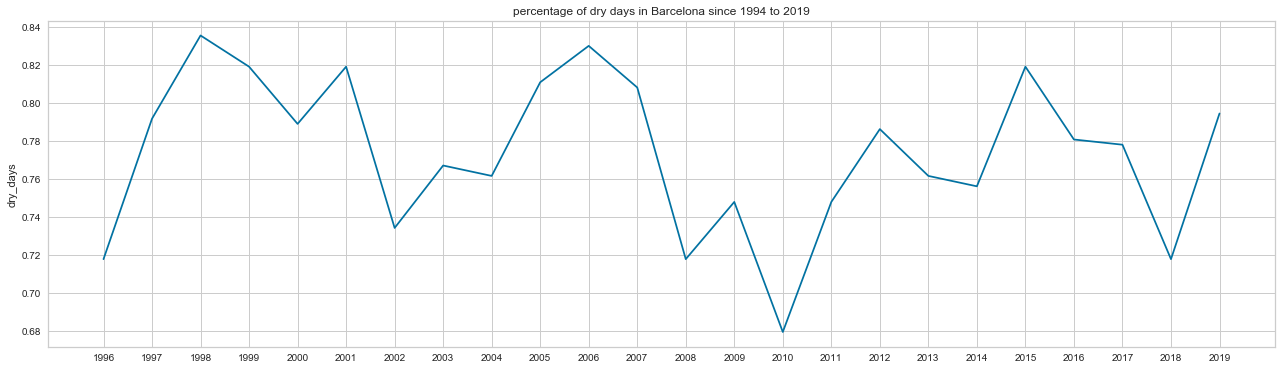

In [68]:
plt.figure(figsize=(22,6))
sns.lineplot(x=dry_years_df.index, y=dry_years_df['dry_days'])
plt.title('percentage of dry days in Barcelona since 1994 to 2019')
plt.show()

In [69]:
#year_avg_rainfalls = pd.pivot_table(data_lluvias, values='PPT24H', index='año', aggfunc='len(lluvias_1996[(lluvias_1996.PPT24H == 0)]/365)')
